In [4]:
import os 
import glob 

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [5]:
test_files = glob.glob('/home/hanna/lagrings/ERA5_monthly/*2012*01*.nc')
data = xr.open_mfdataset(files, compat='no_conflicts')

NameError: name 'files' is not defined

In [13]:
files

['/home/hanna/lagrings/ERA5_monthly/2012_01_tcc.nc']

In [16]:
print("Num files {}".format(len(files)))
data = xr.open_mfdataset(files, compat='no_conflicts')
data = data.sel(time = slice('2012-01-01', '2012-01-07'))

Num files 1


/home/hanna/anaconda3/envs/final/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/hanna/anaconda3/envs/final/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [82]:
both = data['tcc'].mean(['latitude', 'longitude']).values

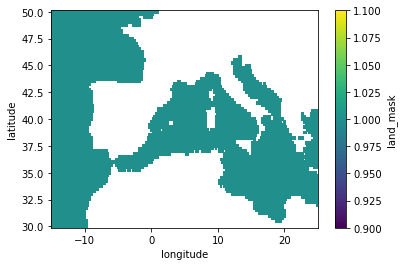

In [76]:
fs = Filter('sea').set_data(data = data, variable = 'tcc')

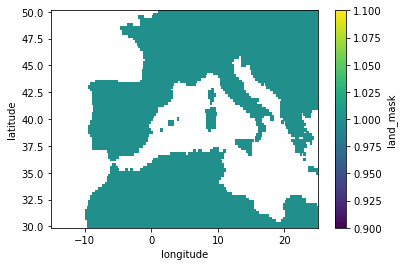

In [77]:
fl = Filter('land').set_data(data = data, variable = 'tcc')

In [83]:
land = fl.get_spatial_mean()

In [84]:
sea = fs.get_spatial_mean()

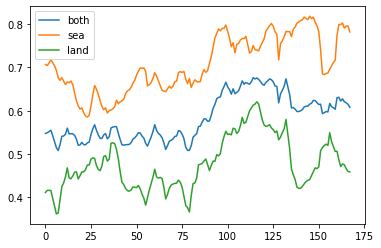

In [85]:
plt.plot(both, label = 'both')
plt.plot(sea, label = 'sea')
plt.plot(land, label = 'land')
plt.legend()


In [75]:
# VALID_VARS  = ['tcc', 'r', 'q', 't2m', 'sp']
VALID_FILTERS = ['coast', 'sea', 'land', 'artefact']

path_filter = '/home/hanna/MS-suppl/filters/'
import numpy as np
import xarray as xr
class Filter:
    """ Filter class for data.
    """
    def __init__(self, filter):
        if not filter:
            raise ValueError('Please provide a filter. \
            Valid filters are {}.'.format( self.VALID_FILTERS ))

        self.filter_key = filter
        self.data = None
        self.filter_ds = None

        self._load() # Automatically loads the filter.
        self.mean = None
        self.variable = None
        return

    def set_data(self, data, variable):
        """ Set the data and filters it.

        Parameters
        ------------------
        data : xr.Dataset
            Data to be filtered.
        """
        self.data = data.copy()
        self.variable = variable
        self.data['filtered'] = (['time', 'latitude', 'longitude'],
                                   self.filter_ds['land_mask'].values*self.data[variable].values)
        return self

    def get_filtered_data(self):
        """Returns the filtered data."""
        return self.data

    def _load(self):
        """ Sets the filter as a xarray dataset in the constructor.
        """
        filters = glob.glob( os.path.join( path_filter,
                                '*{}*.nc'.format(self.filter_key)))
        assert len(filters) == 1, 'Detected {} filters ... '.format(len(filters))
        filt = xr.open_dataset(filters[0])
        filt = xr.where(filt, 1.0, np.nan)
        filt['land_mask'].plot()
        plt.show()
        self.filter_ds = filt
        
        return

    def get_mean(self):
        """ Sum all values and divide by the number of non-zero instances.

        Its safe to assume that only the filtered
        data is identically equal zero.
        """
        matrix = self.data['filtered'].values
        mean = np.nanmean(matrix, axis = 0)
        self.mean = mean
        return mean

    def get_spatial_mean(self):
        """ Sum all values and divide by the number of non-zero instances.

        Its safe to assume that only the filtered
        data is identically equal zero.
        """
        matrix = self.data['filtered'].values
        mean = np.nanmean(matrix, axis = (1, 2))

        self.mean = mean
        return mean

    def get_temporal_mean(self):
        """ Sum all values and divide by the number of non-zero instances.

        Its safe to assume that only the filtered
        data is identically equal zero.
        """
        matrix = self.data['filtered'].values
        mean = np.nanmean(matrix, axis = (1, 2))
        self.mean = mean
        return mean.copy()

    def quick_plot_filtered_data(self):
        """ Quick plot to se the region you are filtering.
        returns ax
        """
        return self.data['filtered'].mean('time').plot()

    def quick_plot_filter(self):
        """ Quick plot to se the region you are filtering.
        returns ax
        """
        return self.filter_ds['land_mask'].plot()